In [88]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [89]:
R=1000   # rabbits
W=40     # wolves
k=0.08
r=0.02
a=0.001
b=0.00002

In [90]:
R_dot=k*R-a*R*W
W_dot=-r*W+b*R*W
x0=np.array([R,W,R_dot,W_dot])
# x0=np.array([R,W])

In [93]:
def f(t,x):    # for teaching purpose
    R,W=x
    #R,W,R_dot,W_dot=x
    R_dot=k*R-a*R*W
    W_dot=-r*W+b*R*W
    return np.array([R_dot,W_dot])

def f2(t,x):
    R,W,R_d,W_d=x
    R_d=k*R-a*R*W
    W_d=-r*W+b*R*W
    R_dd= k*R_d-a*(R_d*W+R*W_d)
    W_dd=-r*W_d+b*(R_d*W+R*W_d)
    return np.array([R_d,W_d,R_dd,W_dd])

In [94]:
ans=sp.integrate.solve_ivp(f2,[0,30000],x0,dense_output=True)

In [132]:
t=np.linspace(0,175,50000)  # time goes from 0 to 175 with 50000 steps

In [133]:
X=ans.sol(t).T

In [134]:
X.shape

(50000, 4)

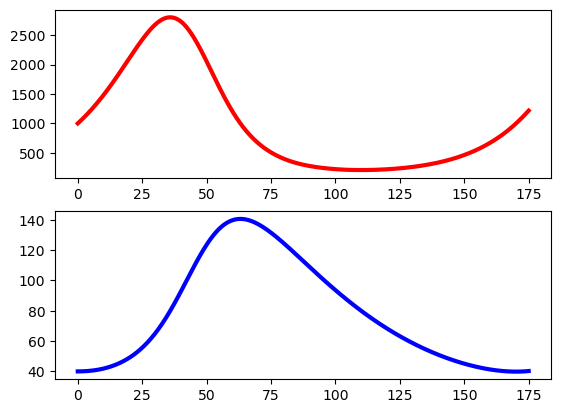

In [135]:
plt.subplot(211)
plt.plot(t,X[:,0],'r-',lw=3)
plt.subplot(212)
plt.plot(t,X[:,1],'b-',lw=3)

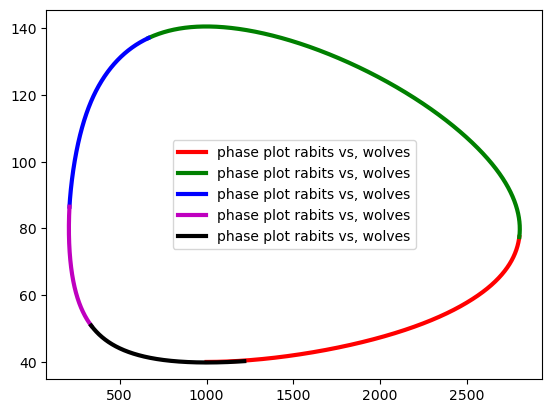

In [136]:
c=np.array(['r-','g-','b-','m-','k-'])
for i in range(5):
    plt.plot(X[i*10000:(i+1)*10000,0],X[i*10000:(i+1)*10000,1],c[i],
             lw=3,label='phase plot rabits vs, wolves')
plt.legend()

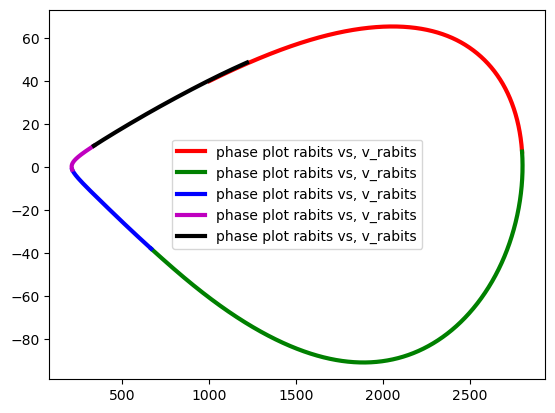

In [139]:
for i in range(5):
    plt.plot(X[i*10000:(i+1)*10000,0],X[i*10000:(i+1)*10000,2],c[i],
           lw=3,label='phase plot rabits vs, v_rabits')
plt.legend()

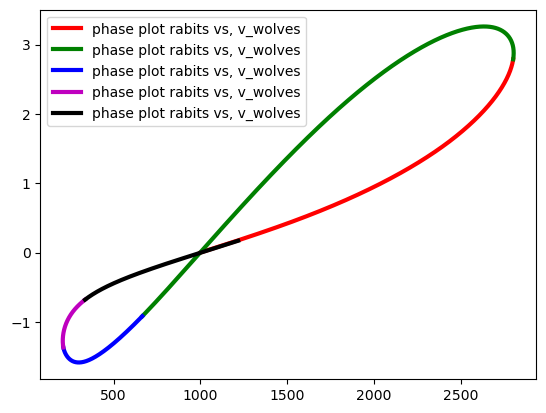

In [142]:
for i in range(5):
    plt.plot(X[i*10000:(i+1)*10000,0],X[i*10000:(i+1)*10000,3],c[i],
              lw=3,label='phase plot rabits vs, v_wolves')
plt.legend()

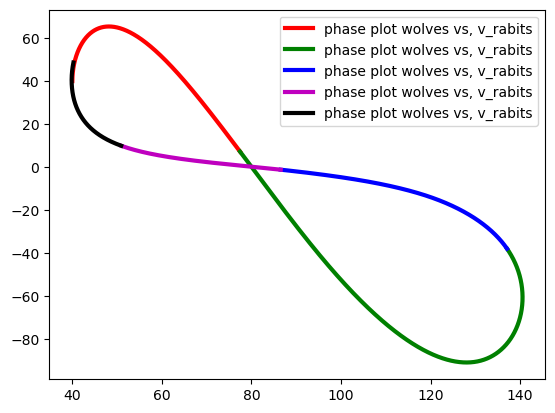

In [143]:
for i in range(5):
    plt.plot(X[i*10000:(i+1)*10000,1],X[i*10000:(i+1)*10000,2],c[i],
             lw=3,label='phase plot wolves vs, v_rabits')
plt.legend()

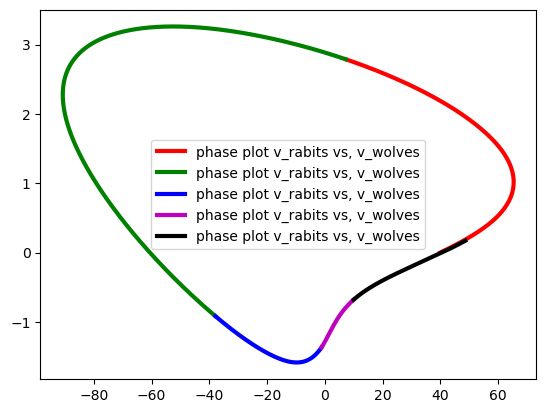

In [148]:
for i in range(5):
    plt.plot(X[i*10000:(i+1)*10000,2],X[i*10000:(i+1)*10000,3],c[i],
              lw=3,label='phase plot v_rabits vs, v_wolves')
plt.legend()

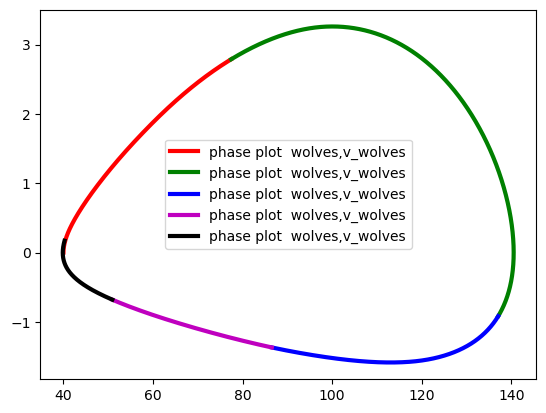

In [149]:
for i in range(5):
    plt.plot(X[i*10000:(i+1)*10000,1],X[i*10000:(i+1)*10000,3],c[i],
             lw=3,label='phase plot  wolves,v_wolves')
plt.legend()